# Week 5 (Dimension Reduction, SVM)

## Dimension Reduction

### `make_regression`을 이용한 PCA Regression

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

scikit-learn에서는 `make_regression` 함수를 이용하여 회귀분석을 연습하기 위한 데이터셋을 만들 수 있다. 이를 이용해서 Principal Component Regression을 연습하는 과제를 진행해보자.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

### Q1 `make_regression` 함수로 데이터를 생성해보자

독립변수는 X1부터 X10까지, 종속변수는 Y를 생성하자. 표본 크기는 1000으로 설정하고, `noise`, `random_state`, `bias`등의 변수는 자유롭게 설정해보자.

In [7]:
# make_regression로 데이터 생성
X, y = make_regression(n_samples=1000, n_features=10, n_targets=1, noise=0.5, random_state=42)

In [8]:
y

array([-6.27996789e+01,  1.08195671e+02, -1.15231935e+02,  3.69311677e+01,
        1.31401728e+02, -2.34092740e+01, -7.88012839e+01,  2.11285478e+02,
        3.34874591e+01, -7.19563263e+01,  6.26800831e+01,  1.79580527e+01,
       -5.62084346e+00,  9.67086845e+01,  1.95696816e+01, -2.39807896e+02,
        1.52332780e+02,  1.58321242e+02, -1.71361030e+01,  6.29210294e+01,
        2.06913923e+01, -1.18491546e+02, -3.58340030e+01, -4.15628163e+01,
        1.61644924e+02,  1.54736235e+02, -1.48562822e+02, -8.22088945e+01,
       -7.06822080e+01, -2.33651318e+01, -9.86198050e+01, -1.60121425e+02,
        9.97696375e+01, -1.20841917e+02,  8.77723834e+00,  1.06294653e+02,
       -1.58565251e+02, -5.03636242e+01,  1.24991746e+02, -1.16000245e+01,
        4.19723440e+01,  1.10358542e+02, -2.13751016e+02,  1.69218108e+02,
        1.94951882e+02, -2.51590286e+02,  1.67009884e+02,  8.70611019e+01,
        7.60374909e+01,  1.90964837e+02,  3.14279468e+02, -2.62259482e+02,
        1.31358850e+02, -

### Q2 EDA를 해보자

각 변수별 히스토그램, scatterplot matrix, correlation matrix, 요약통계량(descriptive statistics)를 그려보자


AttributeError: 'numpy.ndarray' object has no attribute 'corr'

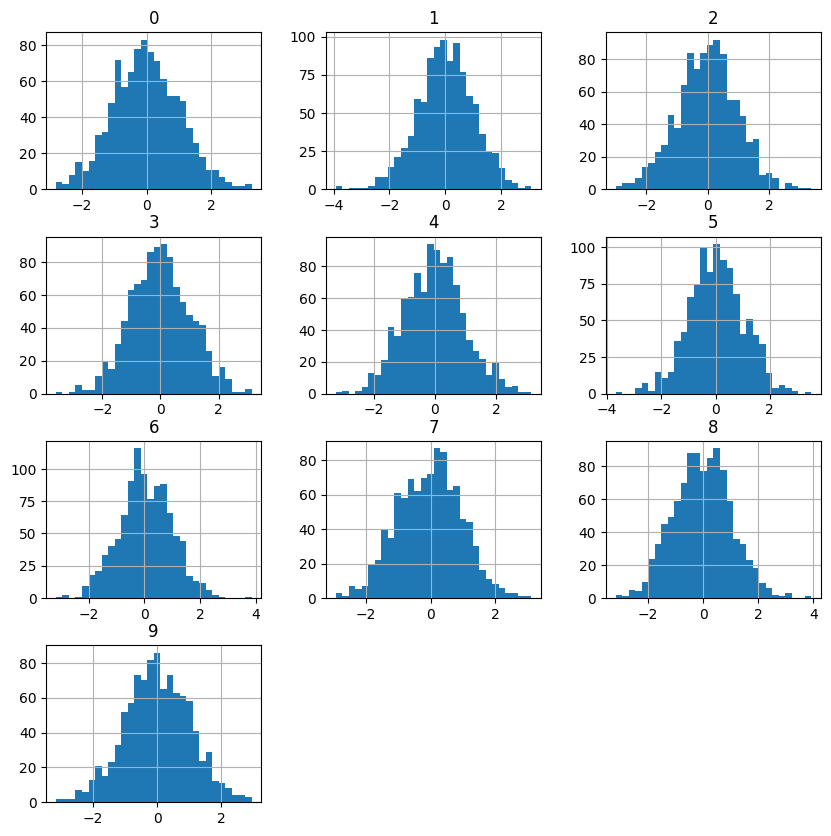

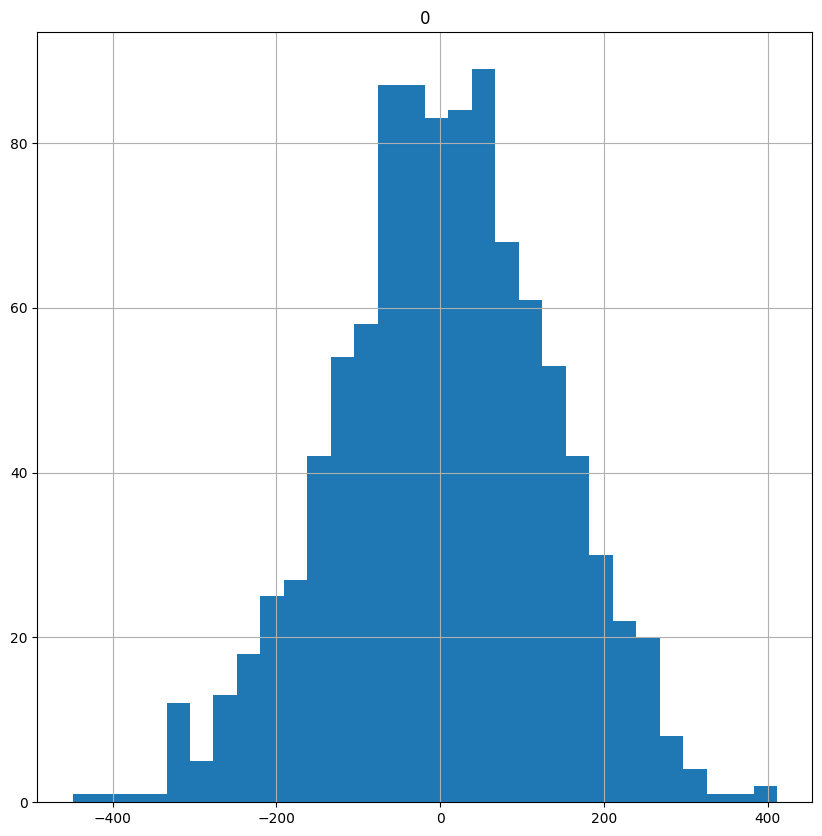

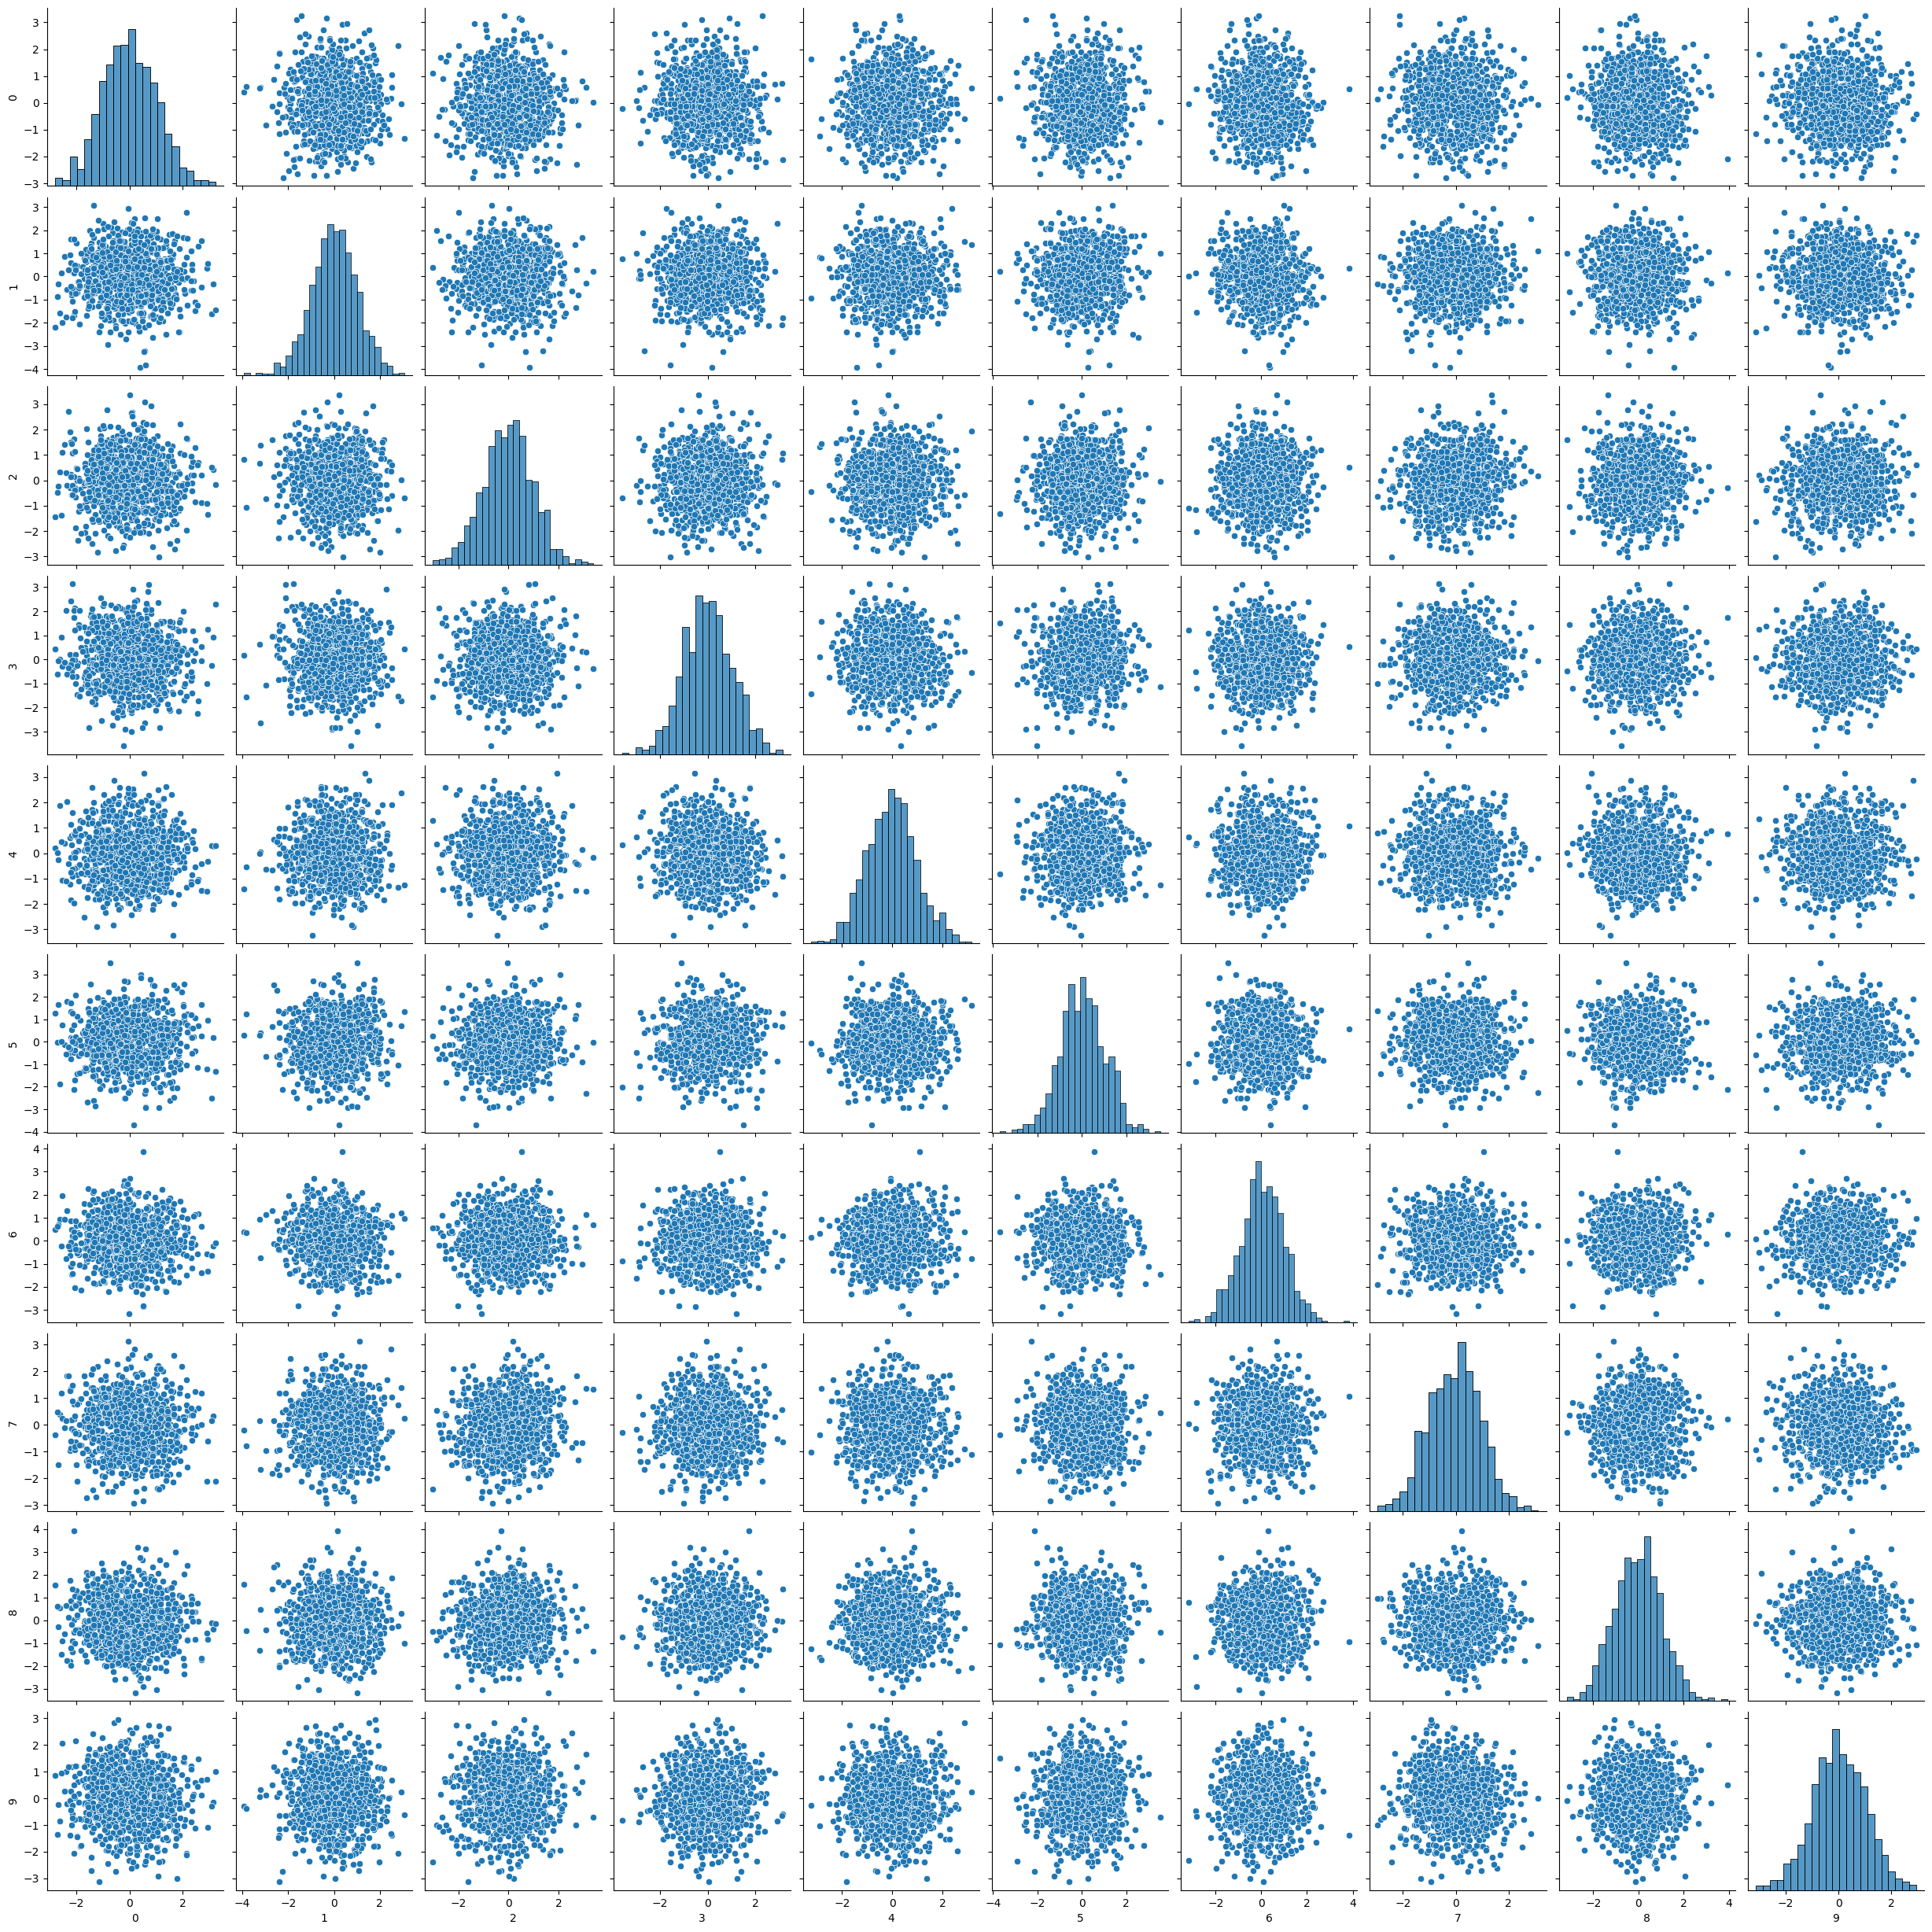

In [17]:
import seaborn as sns
# 히스토그램
pd.DataFrame(X).hist(bins=30, figsize=(10, 10))
pd.DataFrame(y).hist(bins=30, figsize=(10, 10))
# Scatterplot matrix
sns.pairplot(pd.DataFrame(X))

In [22]:
df_x = pd.DataFrame(X)
df_x.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']
df_x

df_y = pd.DataFrame(y)
df_y.columns = ['Y']
df_y
# Correlation matrix
print("correlation matrix: \n", df_x.corr())
# 요약 통계량
print("descriptive statistics \n", df_x.describe())

correlation matrix: 
            X1        X2        X3        X4        X5        X6        X7  \
X1   1.000000 -0.014729 -0.022970 -0.047760  0.005300  0.003115 -0.040194   
X2  -0.014729  1.000000 -0.029257 -0.025767  0.029890  0.015505 -0.037738   
X3  -0.022970 -0.029257  1.000000 -0.000282 -0.012145  0.044905  0.013660   
X4  -0.047760 -0.025767 -0.000282  1.000000 -0.031427  0.034324 -0.004021   
X5   0.005300  0.029890 -0.012145 -0.031427  1.000000  0.001060  0.029390   
X6   0.003115  0.015505  0.044905  0.034324  0.001060  1.000000 -0.000379   
X7  -0.040194 -0.037738  0.013660 -0.004021  0.029390 -0.000379  1.000000   
X8  -0.027056  0.025906  0.083381  0.017622 -0.014704 -0.015515  0.025116   
X9  -0.062372 -0.027021  0.004552  0.006214  0.009023 -0.031786 -0.007680   
X10 -0.008900 -0.017387  0.028298  0.014265  0.010855  0.010398  0.003800   

           X8        X9       X10  
X1  -0.027056 -0.062372 -0.008900  
X2   0.025906 -0.027021 -0.017387  
X3   0.083381  0.00455

### Q3 `StandardScaler` 로 scaling을 해보자

X 변수들에 대해 `StandarScaler`를 이용하여 표준화를 해보자.
PCA를 하기 전에 스케일링을 한다는 점을 유의하자.

In [23]:
from sklearn.preprocessing import StandardScaler

# 스케일링하기
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Q4 `PCA`를 해보자

`PCA` 함수를 이용하여 PCA를 해보자. 또 다음을 해보자.

- PC1 부터 PC10 까지 Scree plot을 그려보자
- PC1과 PC2를 가지고 scatterplot을 그려보자.

In [25]:
from sklearn.decomposition import PCA

# PCA 계산하기
pca = PCA(n_components=10).fit(X_scaled)

print('성분 벡터')
print(pca.components_)
print()

print('데이터 총 분산', np.sum(np.diag(pca.get_covariance())))
print('주성분의 분산', pca.explained_variance_)
print('분산 설명 비율', pca.explained_variance_ratio_)


성분 벡터
[[-0.46681665 -0.19488804  0.50952802  0.34141814 -0.14949762  0.12988275
   0.27496531  0.43774071  0.21514942  0.12322551]
 [-0.34472692 -0.25123309 -0.35971896  0.02666293  0.10239968 -0.47267606
   0.1345549  -0.28800059  0.59382483  0.01873521]
 [-0.14139691  0.45343168  0.06137335 -0.4129201   0.35225602 -0.29979131
   0.19650493  0.46157407  0.0568629  -0.36232526]
 [ 0.11224005 -0.22666071  0.16363231 -0.28207683  0.54759998  0.15181491
   0.51273454 -0.19687316 -0.11799315  0.43725574]
 [-0.39973553  0.56648109 -0.19271196  0.29790689  0.34882983  0.42064768
  -0.13901953 -0.19207315  0.08493164  0.17710345]
 [-0.08523666 -0.09959067 -0.39040747  0.33766025 -0.03640044  0.11304175
   0.58287482 -0.03772934 -0.38277278 -0.4632483 ]
 [-0.08886609  0.22597226 -0.20792604  0.17489563 -0.16019403 -0.52107433
   0.08353293  0.1982548  -0.41834353  0.59054469]
 [ 0.37029399 -0.19897782 -0.01003776  0.55435877  0.57777148 -0.18567298
  -0.24169392  0.28609151  0.04813298 -0.0707

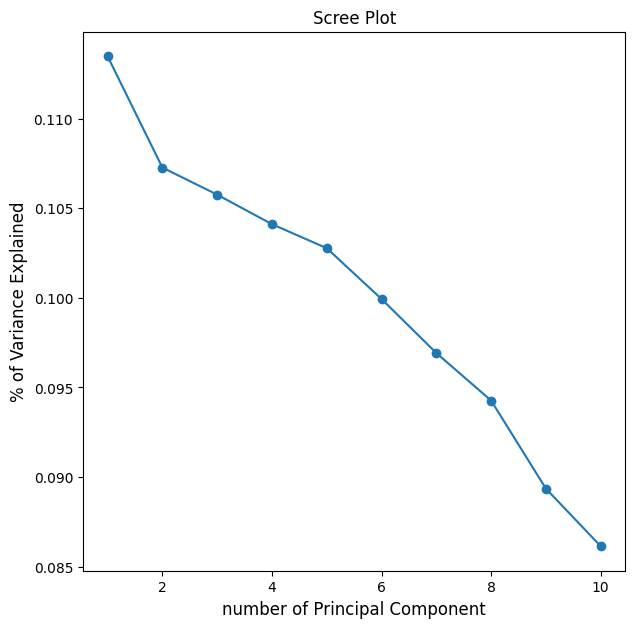

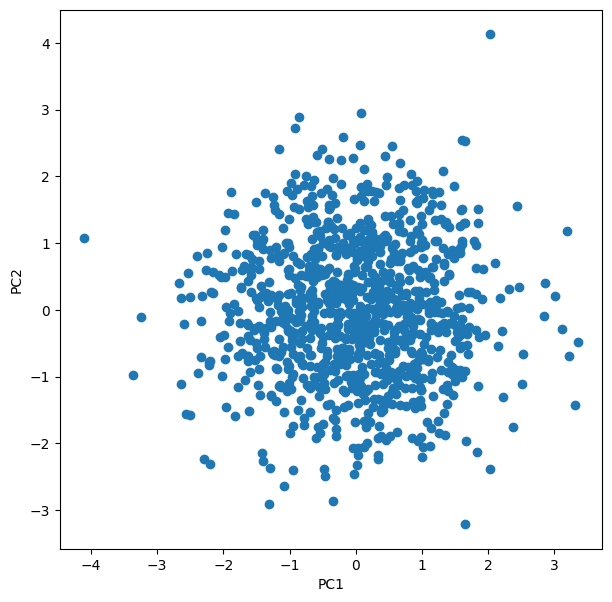

In [30]:
import matplotlib.pyplot as plt
# Scree plot 그리기
plt.rcParams['figure.figsize']=(7,7)
plt.plot(range(1, X_scaled.shape[1]+1), pca.explained_variance_ratio_, 'o-')
plt.title('Scree Plot')
plt.xlabel('number of Principal Component', fontsize=12)
plt.ylabel('% of Variance Explained', fontsize = 12)
plt.show()
# PC1 와 PC2 산점도 그리기
plt.scatter(pca.transform(X_scaled)[:, 0], pca.transform(X_scaled)[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


### Q5 `train_test_split`을 해보자

Train set과 Test set을 6:4 비율로 나눠보자

In [32]:
from sklearn.model_selection import train_test_split

# train set과 test set 나누기
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

###  Q6 Principal Component Regression을 진행해보자.

Q5에서 만든 데이터로부터 다음의 과정으로 문제를 풀어보자.
- Y를 종속변수(`y_train`), `X_train`의 PC1을 종속변수로 하여 Linear Regression을 적합한다.
- `y_pred`과 `y_train`을 비교하여 train error의 MSE를 구한다.
- Principal component을 하나 늘려 Linear regression을 적합한다. 즉 Y에 대해 PC1, PC2으로 Linear Regression을 적합한다.
- 마찬가지로 train error의 MSE를 구한다.
- PC10까지 같은 과정을 반복하고, MSE를 비교한다.



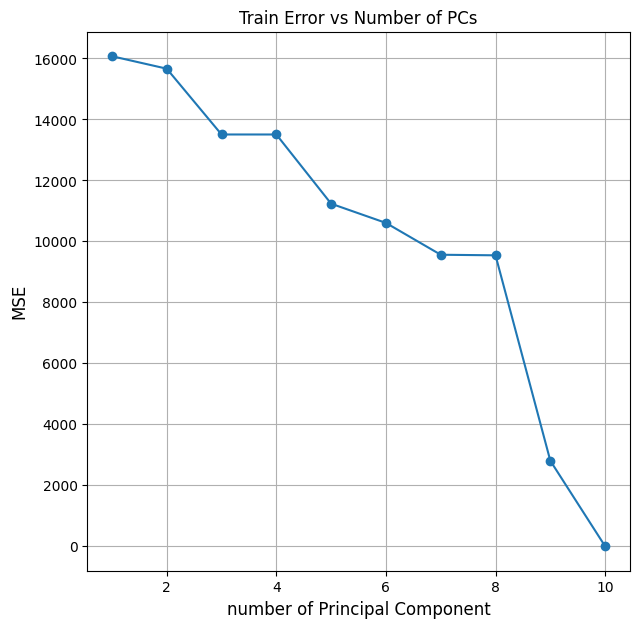

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pca = PCA(n_components=10).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# train MSE 저장
# 회귀모형 적합
mse_train = []
for k in range(1, 11):
  model = LinearRegression().fit(X_train_pca[:,:k], y_train)
  y_pred = model.predict(X_train_pca[:,:k])
  mse_train.append(mean_squared_error(y_train, y_pred))

#결과
plt.plot(range(1,11), mse_train, 'o-')
plt.xlabel('number of Principal Component', fontsize=12)
plt.ylabel('MSE', fontsize = 12)
plt.title('Train Error vs Number of PCs')
plt.grid(True)
plt.show()

In [47]:
# MSE 출력
for k, mse in enumerate(mse_train, start=1):
    print(f"PC1~PC{k}: MSE = {mse:.4f}")

PC1~PC1: MSE = 16073.5603
PC1~PC2: MSE = 15664.7502
PC1~PC3: MSE = 13506.4359
PC1~PC4: MSE = 13505.9927
PC1~PC5: MSE = 11235.8772
PC1~PC6: MSE = 10605.5383
PC1~PC7: MSE = 9561.5468
PC1~PC8: MSE = 9542.8292
PC1~PC9: MSE = 2804.0176
PC1~PC10: MSE = 0.2286


### Q7 Test error을 계산해보자.

위 과정에서 적합한 모형을 바탕으로 `y_test`을 추정하고 `y_test`와의 MSE를 계산하여 test error을 구해보자.

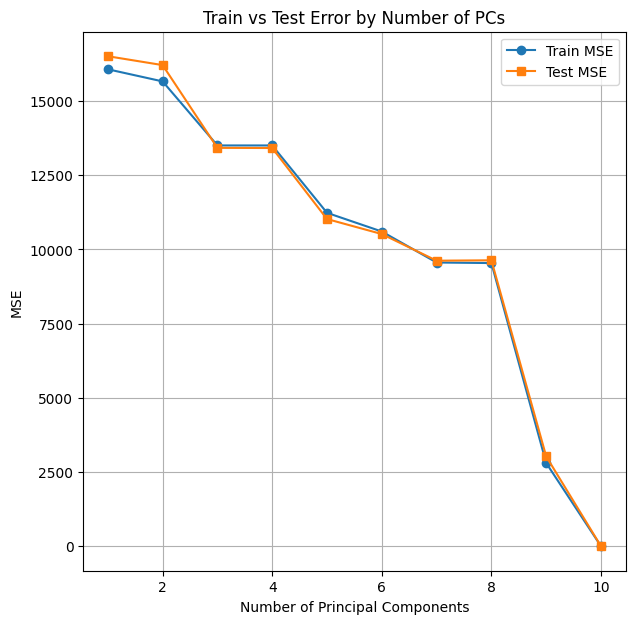

In [48]:
# test MSE 저장
mse_test = []
for k in range(1, 11):
    model = LinearRegression().fit(X_train_pca[:, :k], y_train)
    y_test_pred = model.predict(X_test_pca[:, :k])
    mse_test.append(mean_squared_error(y_test, y_test_pred))

# 그래프
plt.plot(range(1, 11), mse_train, marker='o', label='Train MSE')
plt.plot(range(1, 11), mse_test, marker='s', label='Test MSE')
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Train vs Test Error by Number of PCs')
plt.legend()
plt.grid(True)
plt.show()


## SVM

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC, SVR

- SVC (Classification)
- SVR (Regression)

### 1.1 Hard Margin Classifier

#### Q1.1 Hard Margin Classifier란? :

- 오분류를 허용하지 않는 분류기
- 데이터가 완벽하게 선형 분리될 때 사용한다.
- soft margin classifier보다 상대적으로 margin이 작다

In [50]:
# 데이터셋 생성
X = np.array([[1, 2], [2, 3], [3, 3], [6, 6], [7, 8], [8, 8]])
y = np.array([0, 0, 0, 1, 1, 1])

#### Q1.2 위 데이터셋을 2차원의 좌표평면에 시각화해주세요.

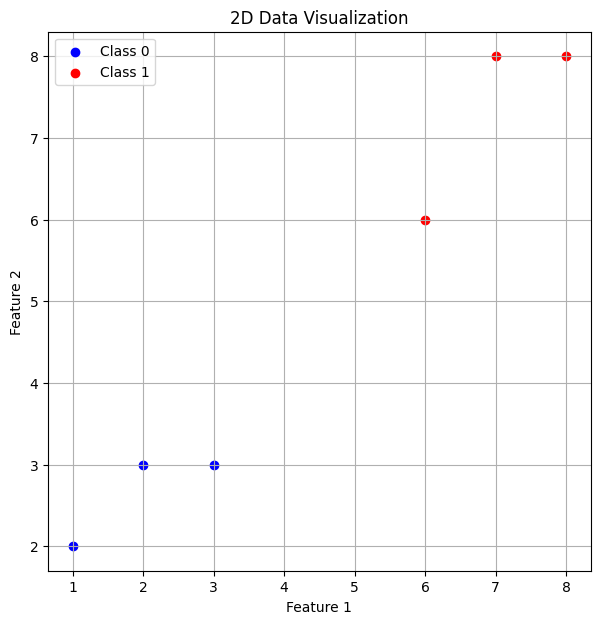

In [56]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='red', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Data Visualization')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
# Hard Margin SVM 모델 학습
model = SVC(kernel='linear', C=1e10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

#### Q1.3 하단 w와 b는 모델 학습으로 찾아낸 Wx+b의 계수와 상수항입니다. w와 b를 정의해주세요.

In [60]:
model.coef_
model.intercept_

array([-3.])

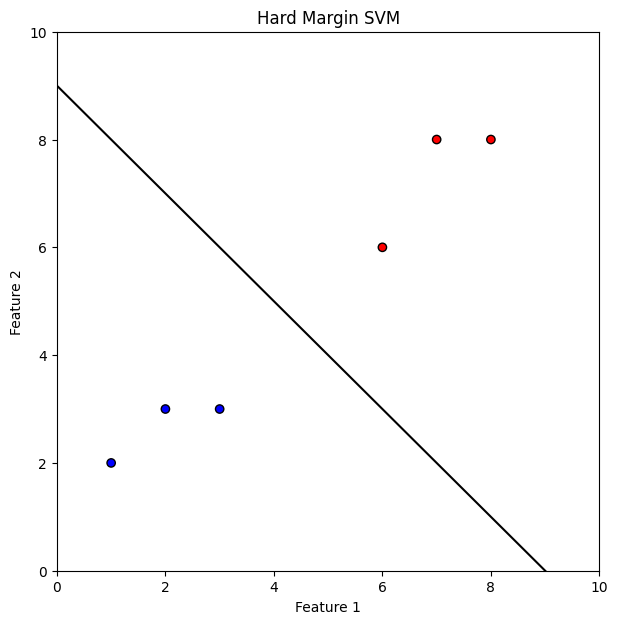

In [61]:
# 결정 경계 시각화
w = model.coef_[0]
b = model.intercept_[0]
x_plot = np.linspace(0, 10, 100)
y_plot = -(w[0] * x_plot + b) / w[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.plot(x_plot, y_plot, 'k-')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hard Margin SVM')
plt.show()

### 1.2 Soft Margin Classifier

#### Q2.1 Soft Margin Classifier란?

- 마진을 넘어가는 경우를 허용는 분류기
- 마진 평면을 넘어가는 인스턴스에 대해 페널티를 부여함.
- c는 얼마나 강한 페널티를 줄 지 결정하는 하이퍼파라미터.

#### Q2.2 Soft Margin의 정의를 떠올리며, 노이즈가 추가된 데이터셋을 생성해주세요. (2개 이상 추가 생성 필요)

In [66]:
# 데이터셋 생성 (약간의 노이즈 추가)
X = np.array([[1, 2], [2, 3], [3, 3], [6, 6], [7, 8], [8, 8], [2, 6], [7, 4]])
y = np.array([0, 0, 0, 1, 1, 1, 1, 0])

In [63]:
# Soft Margin SVM 모델 학습
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)

SVC(kernel='linear')

#### Q2.3 마진을 산출해 시각화하고, Support Vector을 찾아주세요.

하단 그림은 예시로, 꼭 똑같이 출력되지 않아도 됩니다.

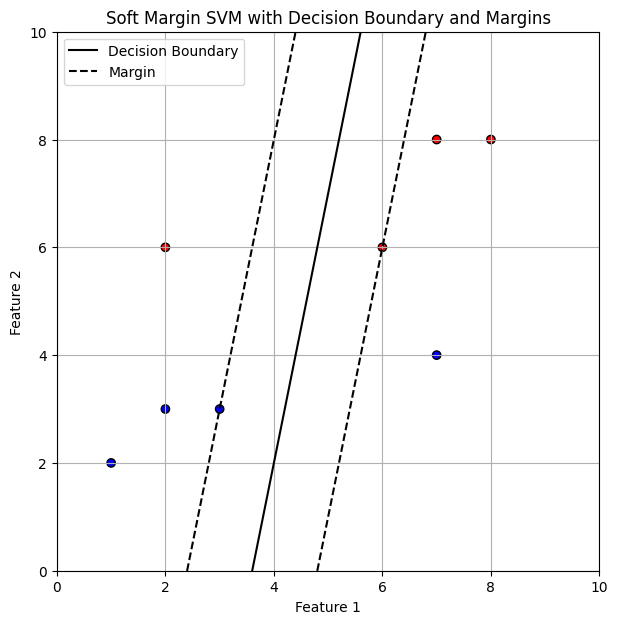

In [67]:
# 결정 경계 시각화
w = model.coef_[0]
b = model.intercept_[0]
x_plot = np.linspace(0, 10, 100)
y_plot = -(w[0] * x_plot + b) / w[1]

# 마진 경계 계산
margin = 1/np.linalg.norm(w)
y_margin_positive = -(w[0]*x_plot + b -1)/w[1]
y_margin_negative = -(w[0]*x_plot + b +1)/w[1]

# 마진 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.plot(x_plot, y_plot, 'k-', label='Decision Boundary')
plt.plot(x_plot, y_margin_positive, 'k--', label='Margin')
plt.plot(x_plot, y_margin_negative, 'k--')

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Soft Margin SVM with Decision Boundary and Margins')
plt.legend()
plt.grid(True)
plt.show()

### 1.3 프로젝트 (SVC)

In [68]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

#### **Linear SVC**

In [69]:
iris = load_iris()

X = iris.data[:, :2]
y = iris.target

C = 1
clf = SVC(kernel = "linear", C=C)
clf.fit(X,y)

SVC(C=1, kernel='linear')

In [70]:
y_pred = clf.predict(X) # 학습 데이터의 재예측 (실습용)
confusion_matrix(y, y_pred) # 따라서, 분류 결과가 상당히 정확할 수밖에 없음을 감안해야 함

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 15, 35]])

#### Q3.1 위 예시처럼, 옵션을 linear로 설정해도 되지만, sklearn의 LinearSVC 함수를 사용해도 구현할 수 있습니다. LinearSVC로 재구현해주세요.

In [71]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix


clf2 = LinearSVC(C=1, max_iter=10000)
clf2.fit(X, y)


y_pred2 = clf2.predict(X)
confusion_matrix(y, y_pred2)

array([[49,  1,  0],
       [ 2, 30, 18],
       [ 0,  9, 41]])

#### **Kernal SVC**

#### Q3.2 Kernel SCV - non-linear한 형태의 SVM을 하나 이상 구현해주세요. 동일하게, 학습데이터를 predict하여 confusion matrix를 구해주세요.

In [72]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


iris = load_iris()
X = iris.data[:, :2]
y = iris.target

clf_rbf = SVC(kernel='rbf', C=1, gamma='scale')
clf_rbf.fit(X, y)

# 학습 데이터로 재예측
y_pred_rbf = clf_rbf.predict(X)

# 혼동 행렬
cm_rbf = confusion_matrix(y, y_pred_rbf)
print("Confusion Matrix (RBF SVM):\n", cm_rbf)

Confusion Matrix (RBF SVM):
 [[50  0  0]
 [ 0 38 12]
 [ 0 15 35]]


In [73]:
# Polynomial kernel SVM
clf_poly = SVC(kernel='poly', degree=3, C=1, gamma='scale')
clf_poly.fit(X, y)

y_pred_poly = clf_poly.predict(X)

cm_poly = confusion_matrix(y, y_pred_poly)
print("Confusion Matrix (Polynomial SVM):\n", cm_poly)

Confusion Matrix (Polynomial SVM):
 [[50  0  0]
 [ 0 38 12]
 [ 0 16 34]]


#### 시각화

#### Q3.3 아래 예시 plot처럼, linear model과 non-linear 모델의 시각화 결과를 출력해주세요.

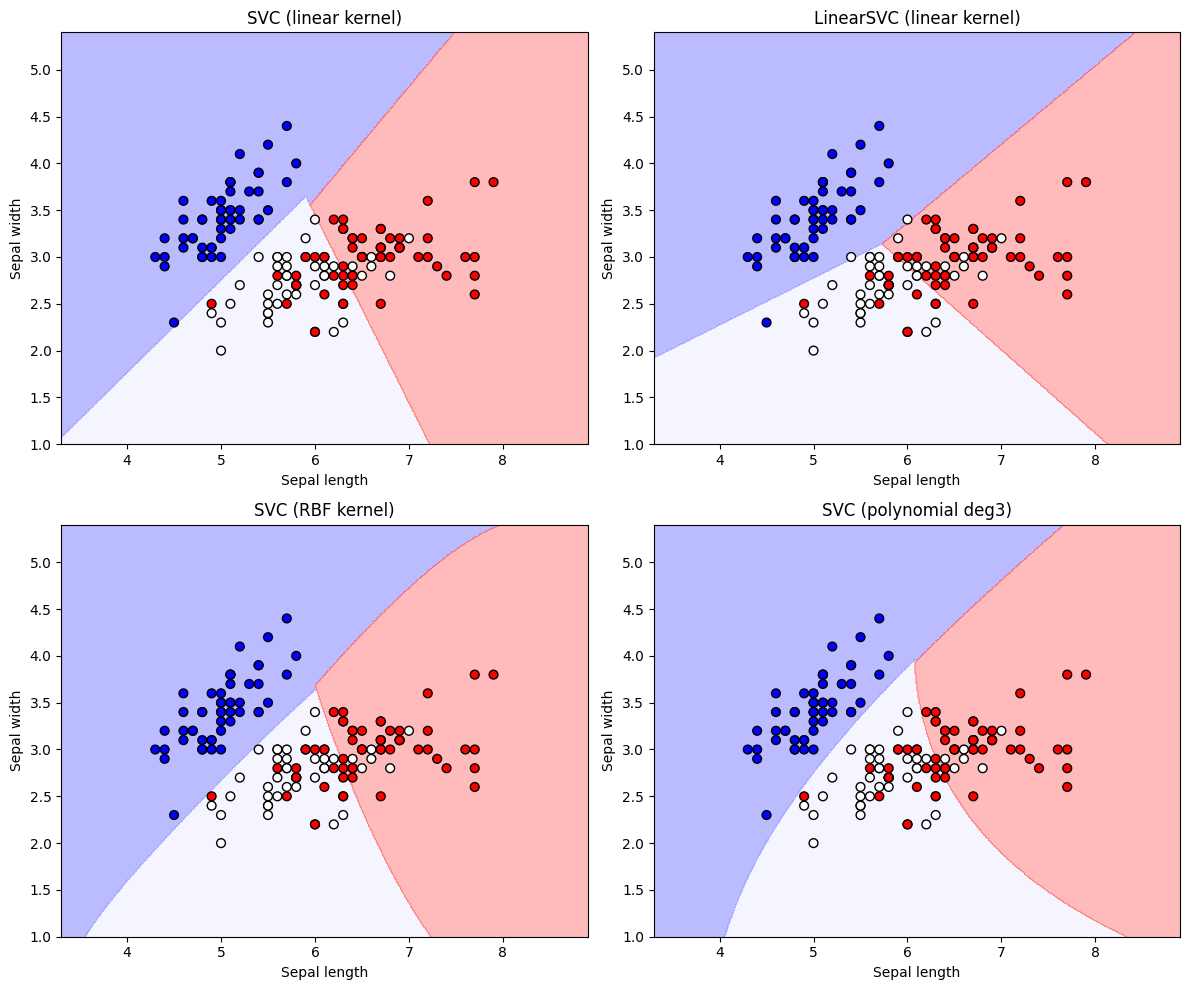

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC, LinearSVC

# 데이터 준비 (2차원 특성)
iris = load_iris()
X = iris.data[:, :2]  # sepal length, sepal width
y = iris.target

# 모델 생성
models = {
    "SVC (linear kernel)": SVC(kernel='linear', C=1).fit(X, y),
    "LinearSVC (linear kernel)": LinearSVC(C=1, max_iter=10000).fit(X, y),
    "SVC (RBF kernel)": SVC(kernel='rbf', gamma='scale', C=1).fit(X, y),
    "SVC (polynomial deg3)": SVC(kernel='poly', degree=3, gamma='scale', C=1).fit(X, y)
}

# meshgrid 생성 (결정 경계 시각화용)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (title, model) in enumerate(models.items()):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[i].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr)
    axes[i].scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolors='k', cmap=plt.cm.bwr)
    axes[i].set_title(title)
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()